In [1]:
import numpy as np
import matplotlib.pyplot as plt

data_dir = "large_clustering"

methods = ["blend", "ls", "pivot", "vote"]
datasets = ["amazon", "dblp", "youtube", "livejournal", "orkut"]

In [2]:
### METHODS:  ls, pivot, vote, blend 

def load_data(data_set, method):

    with open(f"{data_dir}/cikm2024_{method}_{data_set}.txt") as f:
        lines = f.readlines()

    scores = []
    ls_scores = []
    times = []

    for i in range(len(lines)):
        cur_line = lines[i]
        
        if "LocalSearch(0) scores" in cur_line:
            next_line = lines[i + 1]
            vals = next_line.split()
            scores.append(list(map(int, vals)))

        if "LocalSearch(0) times" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            times.append(list(map(float, vals)))
            
        if "LocalSearch(1) scores" in cur_line:        
            next_line = lines[i + 1]
            vals = next_line.split()
            ls_scores.append(list(map(int, vals)))         

    return scores, times, ls_scores



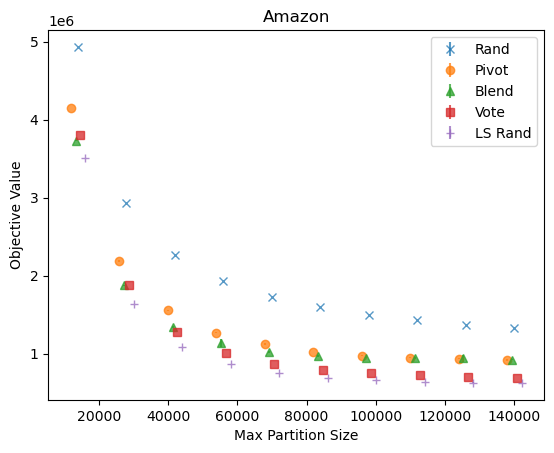

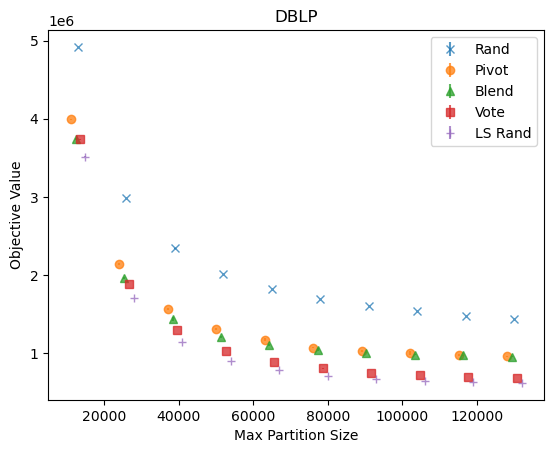

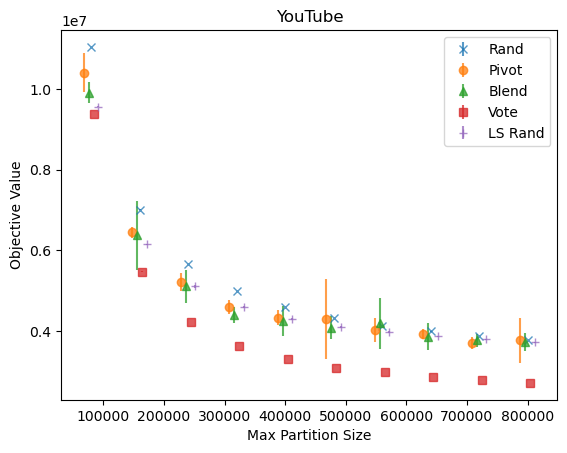

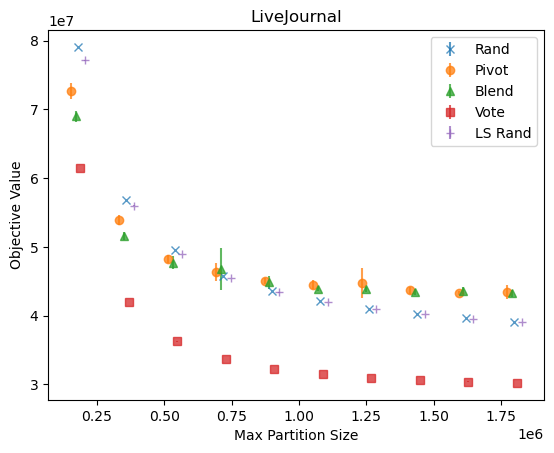

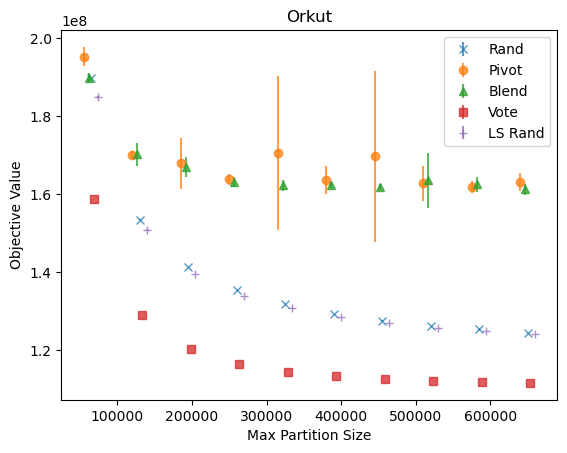

In [4]:
### GATHER RESULTS

def plot_scores(data_set, title, step):
    """
    Cluster sizes range from 10 to 100    
    """
    blend_scores, blend_times, ls_blend = load_data(data_set, "blend")
    pivot_scores, pivot_times, ls_pivot = load_data(data_set, "pivot")
    vote_scores, vote_times, ls_vote = load_data(data_set, "vote")
    rand_scores, rand_times, ls_rand = load_data(data_set, "ls")
    
    x_vals = [step * i for i in range(1, 11)]

    pivot_means = [np.mean(pivot_scores[i]) for i in range(len(x_vals))]
    vote_means = [np.mean(vote_scores[i]) for i in range(len(x_vals))]
    blend_means = [np.mean(blend_scores[i]) for i in range(len(x_vals))]
    rand_means = [np.mean(rand_scores[i]) for i in range(len(x_vals))]
    
    ls_rand_means = [np.mean(ls_rand[i]) for i in range(len(x_vals))]

    # ERROR BAR

    pivot_errs = [np.std(pivot_scores[i]) for i in range(len(x_vals))]
    vote_errs = [np.std(vote_scores[i]) for i in range(len(x_vals))]
    blend_errs = [np.std(blend_scores[i]) for i in range(len(x_vals))]
    rand_errs = [np.std(rand_scores[i]) for i in range(len(x_vals))]
    
    ls_rand_errs = [np.std(ls_rand[i]) for i in range(len(x_vals))]
    
    # print(vote_errs)
      
    # print(pivot_adjust)
    # print(vote_adjust)
    
    # plt.scatter(x_vals, pivot_adjust, label = "Pivot")
    # plt.scatter(x_vals, vote_adjust, label = "Vote")
    
    offset = (x_vals[1] - x_vals[0]) / 10.0
        
    pivot_x = [x_vals[i] - (1.5 * offset) for i in range(len(x_vals))]
    vote_x = [x_vals[i] + (0.5 * offset) for i in range(len(x_vals))]
    blend_x = [x_vals[i] - (0.5 * offset) for i in range(len(x_vals))]
    rand_x = [x_vals[i] + (1.5 * offset) for i in range(len(x_vals))]

    plt.errorbar(x_vals, rand_means, rand_errs, fmt="x", label="Rand", alpha=0.75)
    plt.errorbar(pivot_x, pivot_means, pivot_errs, fmt="o", label="Pivot", alpha=0.75)
    plt.errorbar(blend_x, blend_means, blend_errs, fmt="^", label="Blend", alpha=0.75)
    plt.errorbar(vote_x, vote_means, vote_errs, fmt="s", label="Vote", alpha=0.75)
    
    plt.errorbar(rand_x, ls_rand_means, ls_rand_errs, fmt="+", label="LS Rand", alpha=0.75)

    plt.xlabel("Max Partition Size")
    plt.ylabel("Objective Value")
    plt.title(title)
    plt.legend()
    
    plt.savefig(f"{data_dir}/{data_set}_abs.png")
    plt.show()
    
plot_scores("amazon", "Amazon", 14000)
plot_scores("dblp", "DBLP", 13000)
plot_scores("youtube", "YouTube", 80000)
plot_scores("livejournal", "LiveJournal", 180000)
plot_scores("orkut", "Orkut", 65000)



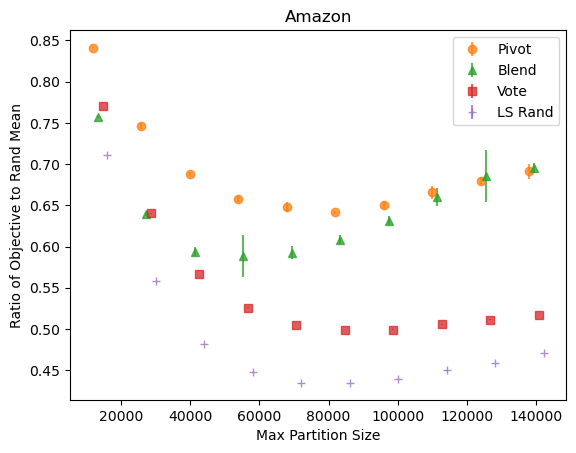

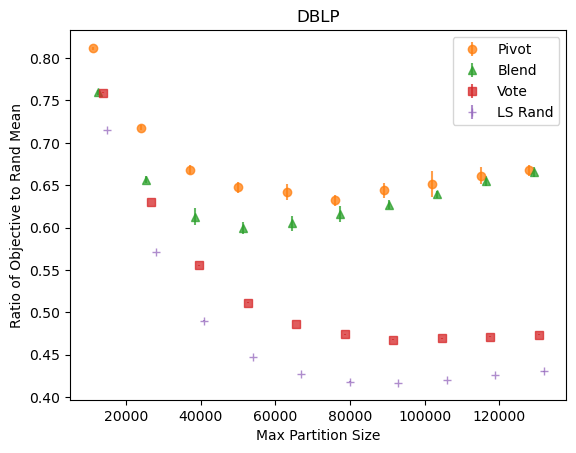

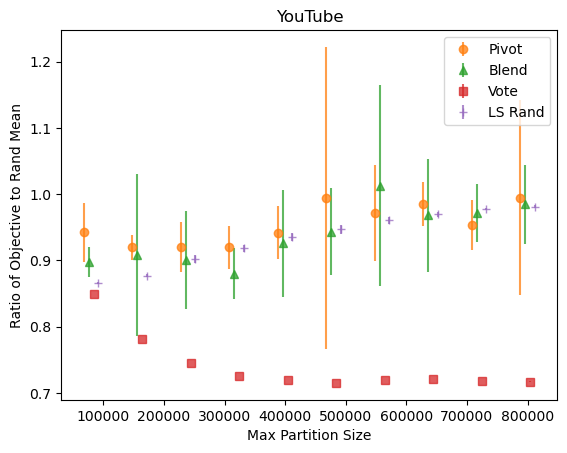

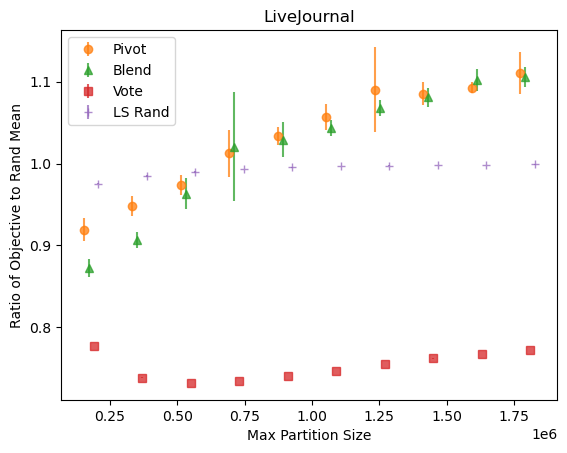

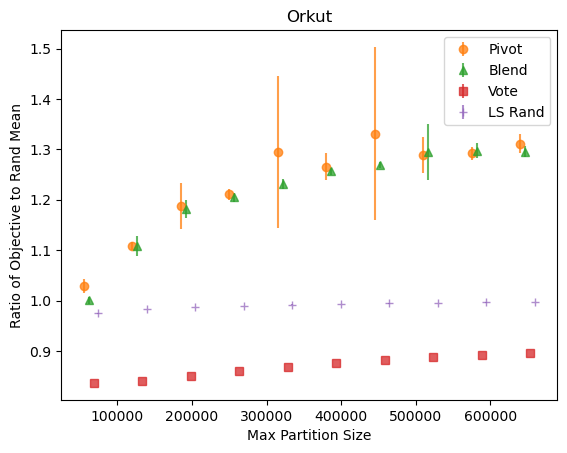

In [5]:
### GATHER RESULTS

def plot_relative_scores(data_set, title, step):
    """
    Cluster sizes range from 10 to 100    
    """

    blend_scores, blend_times, ls_blend = load_data(data_set, "blend")
    pivot_scores, pivot_times, ls_pivot = load_data(data_set, "pivot")
    vote_scores, vote_times, ls_vote = load_data(data_set, "vote")
    rand_scores, rand_times, ls_rand = load_data(data_set, "ls")
    
    x_vals = [step * i for i in range(1, 11)]


    # RAND IS BASE LINE, OTHERS ARE FRACTIONS OF PIVOT AVERAGE     
    
    rand_means = [np.mean(rand_scores[i]) for i in range(len(x_vals))]
    
    pivot_adjust = [np.mean(pivot_scores[i]) / rand_means[i] for i in range(len(x_vals))]
    vote_adjust = [np.mean(vote_scores[i]) / rand_means[i] for i in range(len(x_vals))]
    blend_adjust = [np.mean(blend_scores[i]) / rand_means[i] for i in range(len(x_vals))]

    ls_pivot_adjust = [np.mean(ls_pivot[i]) / rand_means[i] for i in range(len(x_vals))]
    ls_vote_adjust = [np.mean(ls_vote[i]) / rand_means[i] for i in range(len(x_vals))]
    ls_blend_adjust = [np.mean(ls_blend[i]) / rand_means[i] for i in range(len(x_vals))]
    ls_rand_adjust = [np.mean(ls_rand[i]) / rand_means[i] for i in range(len(x_vals))]
    
    # ERROR BAR

    pivot_errs = [np.std(pivot_scores[i])  / rand_means[i] for i in range(len(x_vals))]
    vote_errs = [np.std(vote_scores[i])  / rand_means[i] for i in range(len(x_vals))]
    blend_errs = [np.std(blend_scores[i])  / rand_means[i] for i in range(len(x_vals))]
    
    ls_rand_errs = [np.std(ls_rand[i]) / rand_means[i] for i in range(len(x_vals))]
    
    # print(vote_errs)
      
    # print(pivot_adjust)
    # print(vote_adjust)
    
    # plt.scatter(x_vals, pivot_adjust, label = "Pivot")
    # plt.scatter(x_vals, vote_adjust, label = "Vote")
    
    offset = (x_vals[1] - x_vals[0]) / 10.0
    
    rand_x = [x_vals[i] - (1.5 * offset)  for i in range(len(x_vals))]
    pivot_x = [x_vals[i] - (0.5 * offset) for i in range(len(x_vals))]
    blend_x = [x_vals[i] + (0.5 * offset) for i in range(len(x_vals))]
    vote_x = [x_vals[i] + (1.5 * offset) for i in range(len(x_vals))]

    plt.errorbar(rand_x, pivot_adjust, pivot_errs, fmt="o", c="C1", label="Pivot", alpha=0.75)
    plt.errorbar(pivot_x, blend_adjust, blend_errs, fmt="^", c="C2", label="Blend", alpha=0.75)

    plt.errorbar(blend_x, vote_adjust, vote_errs, fmt="s", c="C3", label="Vote", alpha=0.75)
    
    plt.errorbar(vote_x, ls_rand_adjust, ls_rand_errs, fmt="+", c="C4", label="LS Rand", alpha=0.75)

    plt.xlabel("Max Partition Size")
    plt.ylabel("Ratio of Objective to Rand Mean")
    plt.title(title)
    plt.legend()
    
    plt.savefig(f"{data_dir}/{data_set}_rel.png")
    plt.show()

plot_relative_scores("amazon", "Amazon", 14000)
plot_relative_scores("dblp", "DBLP", 13000)
plot_relative_scores("youtube", "YouTube", 80000)
plot_relative_scores("livejournal", "LiveJournal", 180000)
plot_relative_scores("orkut", "Orkut", 65000)


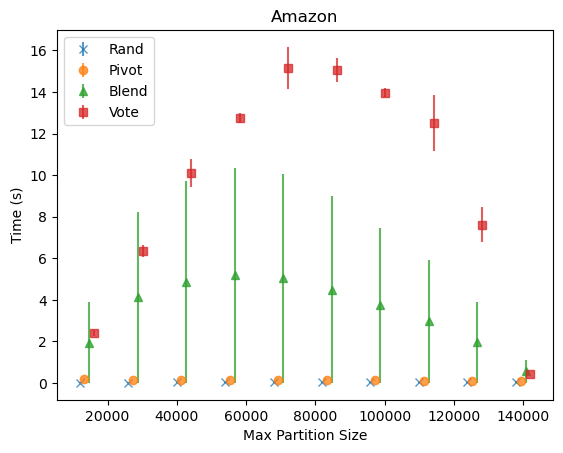

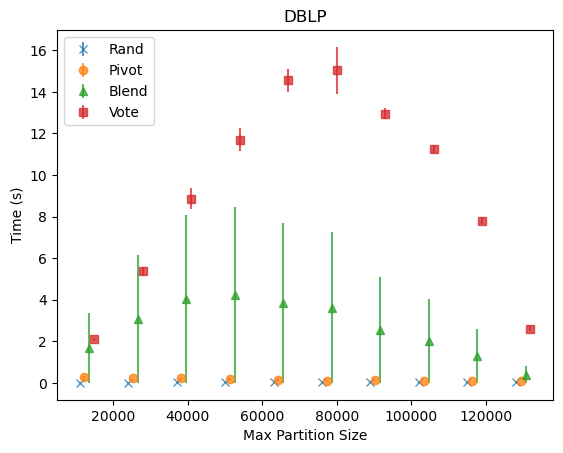

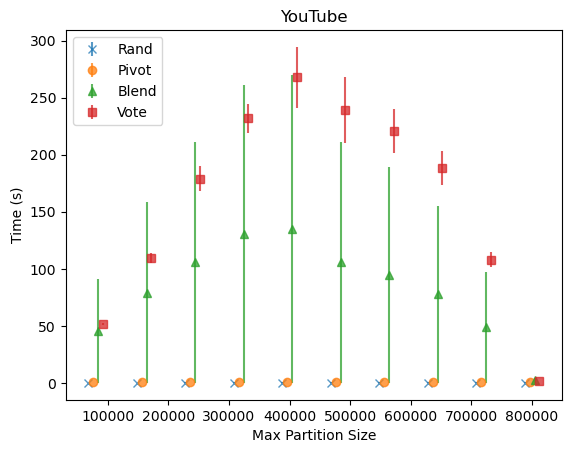

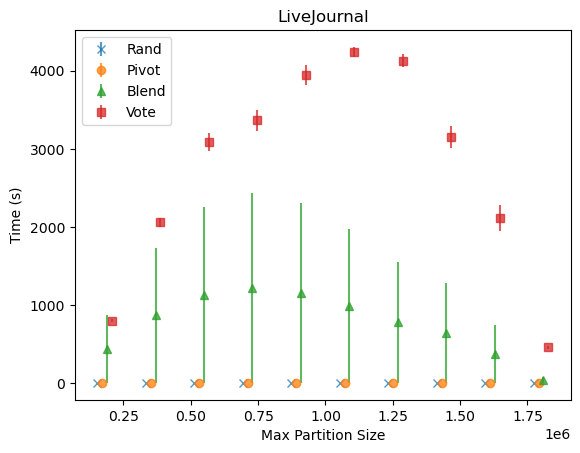

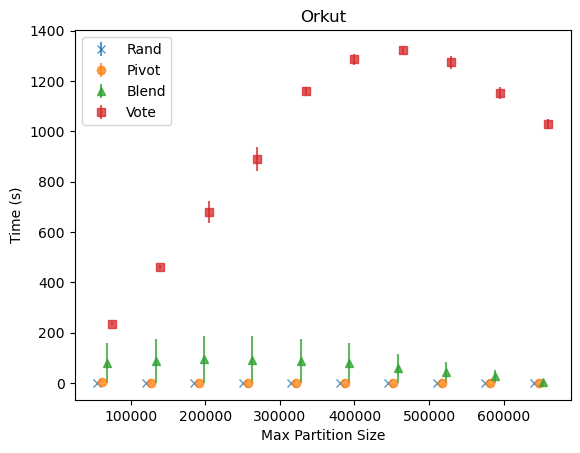

In [6]:
### GATHER RESULTS

def plot_times(data_set, title, step):
    """
    Cluster sizes range from 10 to 100    
    """
    
    blend_scores, blend_times, ls_blend = load_data(data_set, "blend")
    pivot_scores, pivot_times, ls_pivot = load_data(data_set, "pivot")
    vote_scores, vote_times, ls_vote = load_data(data_set, "vote")
    rand_scores, rand_times, ls_rand = load_data(data_set, "ls")
    
    x_vals = [step * i for i in range(1, 11)]
    
    pivot_means = [np.mean(pivot_times[i]) / 1000.0 for i in range(len(x_vals))]
    vote_means = [np.mean(vote_times[i]) / 1000.0 for i in range(len(x_vals))]
    blend_means = [np.mean(blend_times[i]) / 1000.0 for i in range(len(x_vals))]
    rand_means = [np.mean(rand_times[i]) / 1000.0 for i in range(len(x_vals))]

    # ERROR BAR

    pivot_errs = [np.std(pivot_times[i]) / 1000.0 for i in range(len(x_vals))]
    vote_errs = [np.std(vote_times[i]) / 1000.0 for i in range(len(x_vals))]
    blend_errs = [np.std(blend_times[i]) / 1000.0 for i in range(len(x_vals))]
    rand_errs = [np.std(rand_times[i]) / 1000.0 for i in range(len(x_vals))]
    
    offset = (x_vals[1] - x_vals[0]) / 10.0
    
    rand_x = [x_vals[i] - (1.5 * offset)  for i in range(len(x_vals))]
    pivot_x = [x_vals[i] - (0.5 * offset) for i in range(len(x_vals))]
    blend_x = [x_vals[i] + (0.5 * offset) for i in range(len(x_vals))]
    vote_x = [x_vals[i] + (1.5 * offset) for i in range(len(x_vals))]

    plt.errorbar(rand_x, rand_means, rand_means, fmt="x", label="Rand", alpha=0.75)
    plt.errorbar(pivot_x, pivot_means, pivot_errs, fmt="o", label="Pivot", alpha=0.75)
    plt.errorbar(blend_x, blend_means, blend_means, fmt="^", label="Blend", alpha=0.75)
    plt.errorbar(vote_x, vote_means, vote_errs, fmt="s", label="Vote", alpha=0.75)

    plt.xlabel("Max Partition Size")
    plt.ylabel("Time (s)")
    plt.title(title)
    plt.legend(loc="upper left")
    
    plt.savefig(f"{data_dir}/{data_set}_time.png")
    plt.show()
    
plot_times("amazon", "Amazon", 14000)
plot_times("dblp", "DBLP", 13000)

plot_times("youtube", "YouTube", 80000)
plot_times("livejournal", "LiveJournal", 180000)

plot_times("orkut", "Orkut", 65000)
